# 기본적인 영상처리 기법

In [4]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## 특정 색상 영역 추출

### 색 공간에서 녹색 영역 추출하기
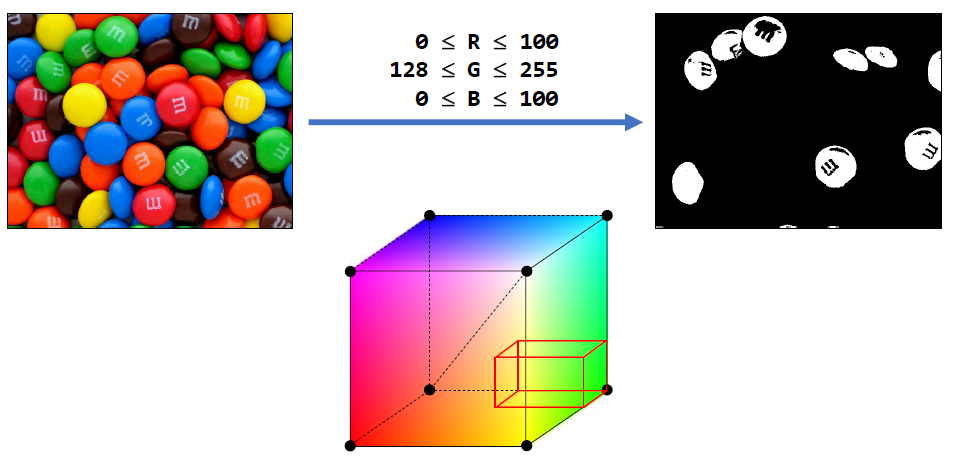

보통 RGB에서 영역 추출보단 HSV에서 영역 추출을 일반적으로 한다

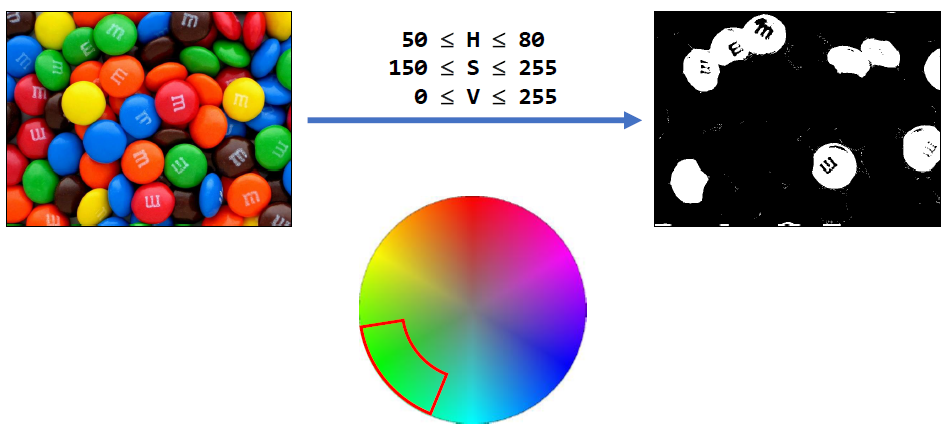

#### RGB, HSV 추출의 차이점
- RGB는 영상 채널에 색정보와 밝기다 다 들어있어서 영상이 밝냐, 어둡냐에 따라 추출할 때 결과가 달라질 수 있다.
- HSV는 색 정보는 따로, 밝기(V)가 따로 있기에 V를 전범위(0~255)로 해주면 영향이 거의 없이 동일한 결과를 얻을 수 있다 

##### RGB

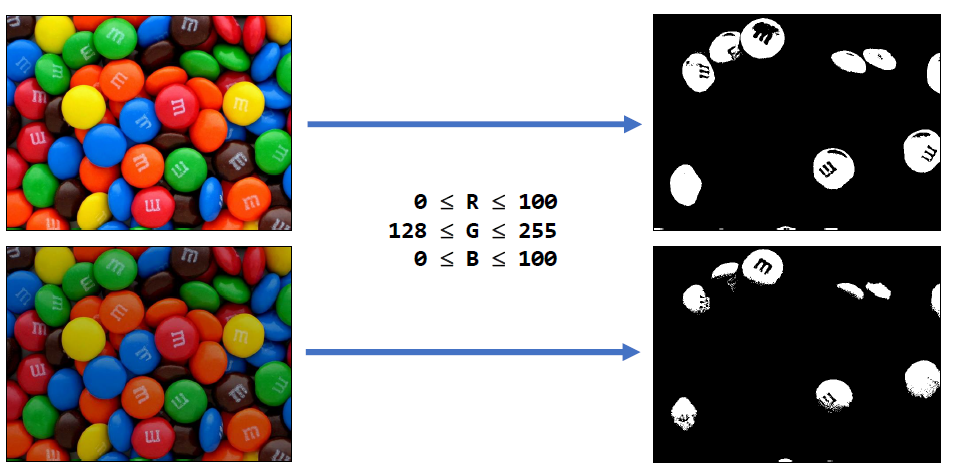

##### HSV

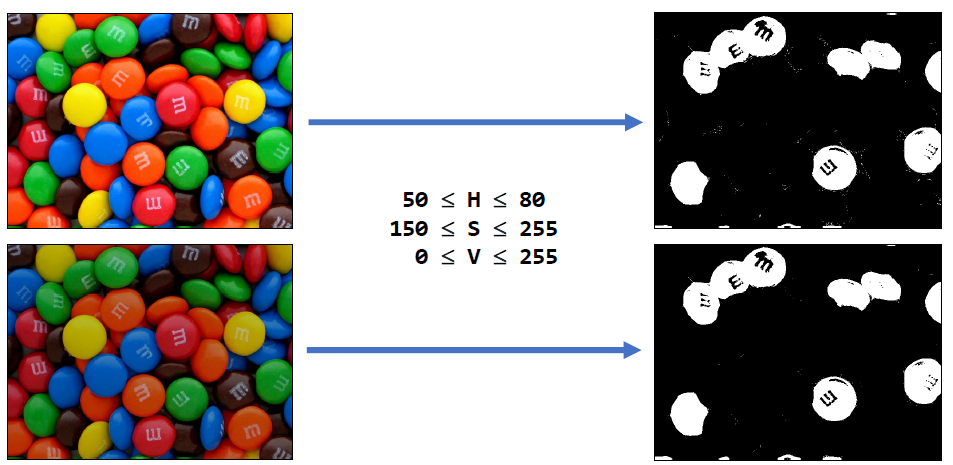

#### 추출 함수 - inRange
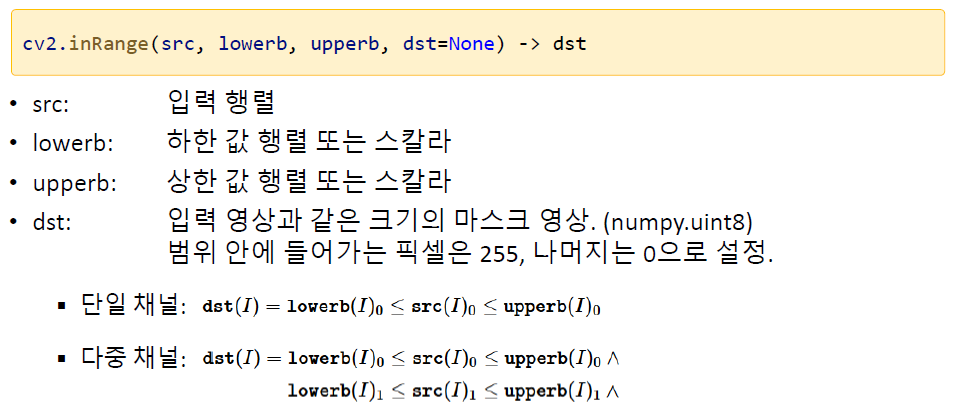

In [5]:
# base_dir
bd = "/content/drive/MyDrive/New_Colab/src/opencv/ch03/"

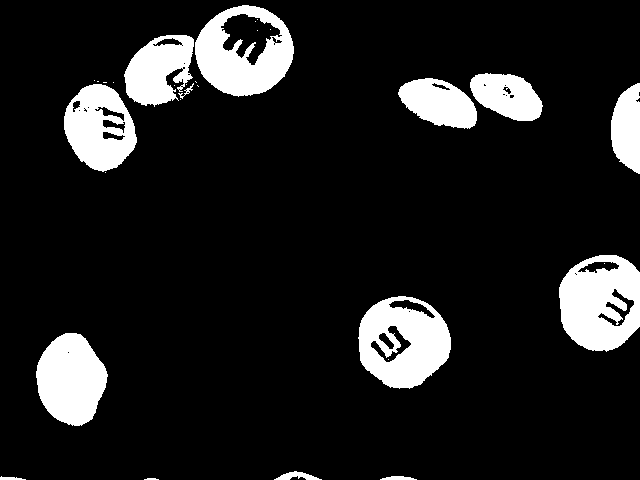

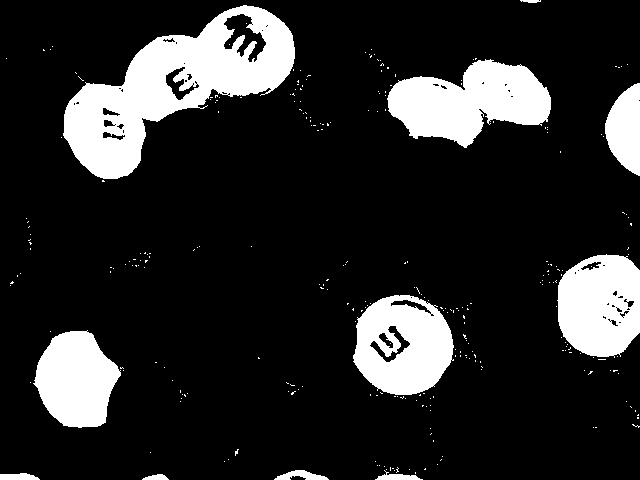

In [6]:
src = cv2.imread(bd+'candies.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))

cv2_imshow(dst1)
cv2_imshow(dst2)

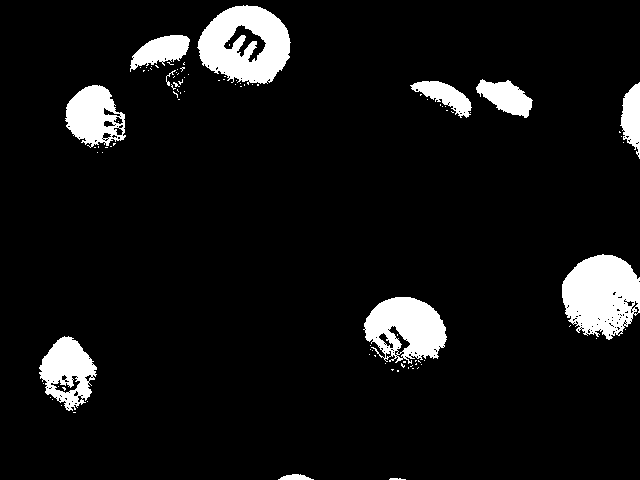

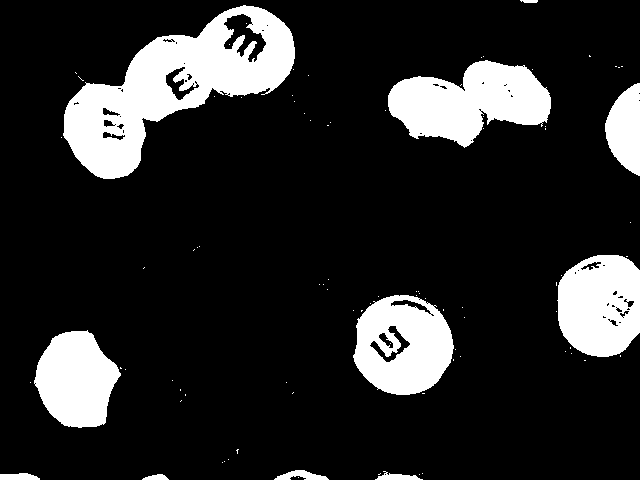

In [7]:
src = cv2.imread(bd+'candies2.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))

cv2_imshow(dst1)
cv2_imshow(dst2)

In [ ]:
## 트랙바로 조절하면서 보기 (colab에선 지원하지 않는다) 
# src = cv2.imread(bd+'candies.png')
# src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# def on_trackbar(pos):
#     hmin = cv2.getTrackbarPos('H_min', 'dst')
#     hmax = cv2.getTrackbarPos('H_max', 'dst')

#     dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
#     cv2_imshow(dst)

# cv2_imshow(src)
# cv2.namedWindow('dst')

# cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
# cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)
# on_trackbar(0)
# cv2.waitKey()

## 히스토그램 역투영

- 히스토그램 역투영(Histogram backprojection)
    - 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지를 검사하는 방법
    - 임의의 색상 영역을 검출할 때 효과적
    - inRange는 범위를 사각형으로 지정해서 추출하는 것, 역투영은 선택한 영역의 색을 딱 맞게 지정해서 찾는 것

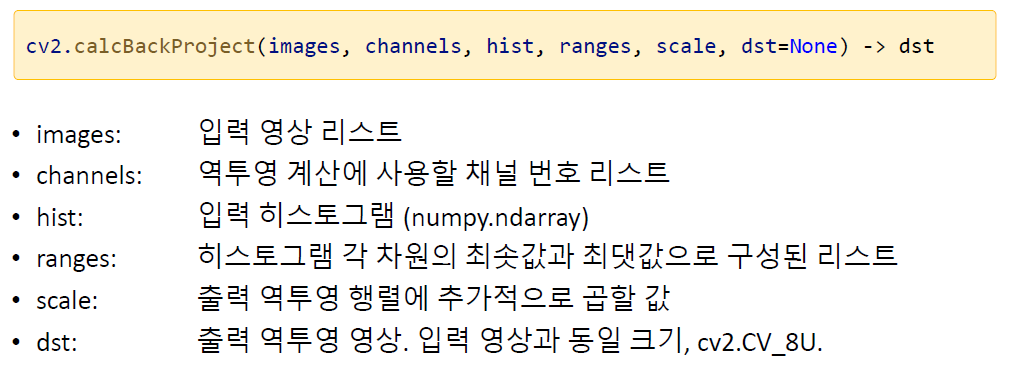

In [ ]:
## colab에선 지원 안됨...
# # 입력 영상에서 ROI를 지정하고, 히스토그램 계산

# src = cv2.imread(bd+'cropland.png')

# if src is None:
#     print('Image load failed')
#     sys.exit()

# x, y, w, h = cv2.selectROI(src)

# # 미리 히스토그램 계산해야 함
# src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# crop = src_ycrcb[y:y+h, x:x+w]

# channels = [1, 2] # Cr, Cb 채널만 선택
# cr_bins = 128
# cb_bins = 128
# histSize = [cr_bins, cb_bins]
# cr_range = [0, 256]
# cb_range = [0, 256]
# ranges = cr_range + cb_range

# hist = cv2.calcHist([crop], channels, None, histSize, ranges)
# hist_norm = cv2.normalize(hist, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# # 입력 영상 전체에 대해 히스토그램 역투영
# backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
# dst = cv2.copyTo(src, backproj)

# cv2_imshow(backproj)
# cv2_imshow(hist_norm)

# 크로마키 합성

## 크로마키(Chromakey) 합성이란?
- 녹색 또는 파란색 배경에서 촬영한 영상에 다른 배경 영상을 합성하는 기술

## 구현 할 기능
- 녹색 스크린 영역 추출하기
- 녹색 영역에 다른 배경 영상을 합성하여 저장하기
- 스페이스바를 이용하여 크로마키 합성 동작 제어하기

### 녹색 스크린 영역 추출하기
- 크로마키 영상을 HSV 색 공간으로 변환
- cv2.inRange() 함수를 사용하여 50 $\le$ H $\le$ 80, 150$\le$S$\le$255, 0$\le$V$\le$255 범위의 영역을 검출 

In [8]:
from tqdm import tqdm

In [9]:
# 녹색 배경 동영상
cap1 = cv2.VideoCapture(bd+'woman.mp4')

if not cap1.isOpened():
    print('video open failed')
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture(bd+'raining.mp4')

if not cap2.isOpened():
    print('video open failed')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'w x h : {w} x {h}')
print('frame_cnt1 : ', frame_cnt1)
print('frame_cnt2 : ', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 출력 동영상 객체 생성
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

# 합성 여부 플래그 (어떨 때는 그냥 영상, 어떨 때는 합성 영상 보여주는 선택)
do_composit = True #False

cnt_break = 0 
# 전체 동영상 재생
while tqdm(True):
    if cnt_break = 50:
        break
        
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (80, 255, 255))
        cv2.copyTo(frame2, mask, frame1)

    out.write(frame1)

    cv2_imshow(frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

    cnt_break += 1

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.